<a href="https://colab.research.google.com/github/ish-war/car-evaluation/blob/main/ish_car_evaluation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎢 **Car Evaluation Model**  🎢

## **Objective** 👽

Develop a machine learning model to accurately predict the suitability of a car based on its various attributes. This typically involves classifying cars into different categories such as "acceptable," "good," "very good," or "unacceptable" based on criteria like price, maintenance cost, number of doors, capacity, safety features, etc. This model aims to assist users in making informed decisions when evaluating different cars for potential purchase.

## **Project Summary** ⛵

In summary, the model performs well in predicting car evaluations based on the provided dataset, showing a good balance between precision and recall. It has high accuracy, precision, and ROC AUC scores, indicating its effectiveness in classifying instances correctly and distinguishing between different classes. It can be considered useful for identifying cars that may be considered "acceptable" or "unacceptable" based on their attributes.

In [ ]:
 # first step - import bacis necessary tools / libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# load csv file in the dataframe

df = pd.read_csv('/content/car evaluation_with.csv')
df

,vhigh,vhigh.1,2,2.1,small,med,unacc
0,vhigh,vhigh,2,2,small,high,unacc
1,vhigh,vhigh,2,2,med,low,unacc
2,vhigh,vhigh,2,2,med,med,unacc
3,vhigh,vhigh,2,2,med,high,unacc
4,vhigh,vhigh,2,2,big,low,unacc
...,...,...,...,...,...,...,...
1721,low,low,5,5,med,med,good
1722,low,low,5,5,med,high,vgood
1723,low,low,5,5,big,low,unacc
1724,low,low,5,5,big,med,good


In [ ]:
# let's check total number of rows and columns
print(f"We have total {df.shape[0]} rows and {df.shape[1]} columns in the dataset." )

We have total 1726 rows and 7 columns in the dataset.


## **Variables Description** 📰


PRICE
1.   "buying": The buying price
2.   "maintainance": The price of the maintenance

COMFORT


1.   "doors": The number of doors
2.    "persons": The capacity in terms of number of persons to carry
3. "lug_storage": The size category of luggage boot
4. "safety": The estimated safety level of the car


## **Change columns names** 📛

Here, we can see that the column names are not correct and it's hard to understand the data from such names. So, let's change the names of columns first for our undersanding of the dataset. 😍

In [ ]:
# New column names
new_column_names = [
    "buying",
    "maintainance",
    "doors",
    "persons",
    "lug_storage",
    "safety",
    "target"
]

# Assign new column names to the DataFrame
df.columns = new_column_names
df

,buying,maintainance,doors,persons,lug_storage,safety,target
0,vhigh,vhigh,2,2,small,high,unacc
1,vhigh,vhigh,2,2,med,low,unacc
2,vhigh,vhigh,2,2,med,med,unacc
3,vhigh,vhigh,2,2,med,high,unacc
4,vhigh,vhigh,2,2,big,low,unacc
...,...,...,...,...,...,...,...
1721,low,low,5,5,med,med,good
1722,low,low,5,5,med,high,vgood
1723,low,low,5,5,big,low,unacc
1724,low,low,5,5,big,med,good


In [ ]:
# list of column names that are changed
df.columns

Index(['buying', 'maintainance', 'doors', 'persons', 'lug_storage', 'safety',
       'target'],
      dtype='object')

## **let's take a look at some rows and columns in the given dataset ✅**

In [ ]:
# first five rows in the dataset
df.head()

,buying,maintainance,doors,persons,lug_storage,safety,target
0,vhigh,vhigh,2,2,small,high,unacc
1,vhigh,vhigh,2,2,med,low,unacc
2,vhigh,vhigh,2,2,med,med,unacc
3,vhigh,vhigh,2,2,med,high,unacc
4,vhigh,vhigh,2,2,big,low,unacc


In [ ]:
# last five rows in the dataset
df.tail()

,buying,maintainance,doors,persons,lug_storage,safety,target
1721,low,low,5,5,med,med,good
1722,low,low,5,5,med,high,vgood
1723,low,low,5,5,big,low,unacc
1724,low,low,5,5,big,med,good
1725,low,low,5,5,big,high,vgood


In [ ]:
# checking the basic information of given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1726 non-null   object
 1   maintainance  1726 non-null   object
 2   doors         1726 non-null   int64 
 3   persons       1726 non-null   int64 
 4   lug_storage   1726 non-null   object
 5   safety        1726 non-null   object
 6   target        1726 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.5+ KB


✅ the .info() method provided by panda gives us information about the data types of each column, number of non-null values, and memory usage. ✅

In [ ]:
# Investigating the summary statistics to understand the data's distribution.
# here we are rounding the decimal value at 2 for better understanding.

df.describe(include = 'all').round(2)

,buying,maintainance,doors,persons,lug_storage,safety,target
count,1726,1726,1726.00,1726.00,1726,1726,1726
unique,4,4,NaN,NaN,3,3,4
top,high,high,NaN,NaN,med,high,unacc
freq,432,432,NaN,NaN,576,576,1208
mean,NaN,NaN,3.50,3.67,NaN,NaN,NaN
std,NaN,NaN,1.12,1.25,NaN,NaN,NaN
min,NaN,NaN,2.00,2.00,NaN,NaN,NaN
25%,NaN,NaN,3.00,2.00,NaN,NaN,NaN
50%,NaN,NaN,4.00,4.00,NaN,NaN,NaN
75%,NaN,NaN,4.75,5.00,NaN,NaN,NaN


Here, we can see that we are getting NaN, this means we may have missing values in our dataset. ✅

## **Let's make copy of dataset 😍**

In [ ]:
df1 = df.copy()

By creating a copy of dataframe we have advantages like -
1. to preserve original data
2. avoid unintended side effects
3. freely modify the data as per our wish

## **Data Cleaning 😉**


Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of oru model.

While cleaning data we will perform following steps:

1. Remove duplicate rows.
2. Handling missing values.
3. Convert columns to appropriate datatypes.
4. Adding important columns.

In [ ]:
df1.duplicated().value_counts()    # give number of duplicated rows if available as true

False    1726
dtype: int64

Here, we can see that there are no duplicated values in our dataset. ✅

In [ ]:
df1.isnull().sum()    # checking the total numbar of null values by getting there SUM

buying          0
maintainance    0
doors           0
persons         0
lug_storage     0
safety          0
target          0
dtype: int64

Here, we can see that there is no any null value. ✅

## **Let's work on columns 😍**

Here, we have changed the names of columns in the dataset for better understanding of values assigned in those columns. ✅

In [ ]:
df1.columns       # list of column names that are changed

Index(['buying', 'maintainance', 'doors', 'persons', 'lug_storage', 'safety',
       'target'],
      dtype='object')

In [ ]:
# let's look at different values in the columns
# this shows unique values in that column and their count

for column in df.columns :
  print(df1[column].value_counts())

high     432
med      432
low      432
vhigh    430
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    430
Name: maintainance, dtype: int64
3    432
4    432
5    432
2    430
Name: doors, dtype: int64
4    576
5    576
2    574
Name: persons, dtype: int64
med      576
big      576
small    574
Name: lug_storage, dtype: int64
high    576
low     575
med     575
Name: safety, dtype: int64
unacc    1208
acc       384
good       69
vgood      65
Name: target, dtype: int64


In [ ]:
# let's make our target variable as binary for better model accuraacy
# if the quality is good and very good then we are adding those cars to acceptable
df1['target'] = df1['target'].replace(['good', 'vgood'], 'acc')

In [ ]:
df1['target'].value_counts()      # value count of target column after change

unacc    1208
acc       518
Name: target, dtype: int64

In [ ]:
df1.shape

(1726, 7)

## **Numeric Data** 🔢

Let's convert each variable in dataset in a numerical form. Data is often converted into numerical form when building models because many machine learning algorithms and statistical techniques are designed to work with numerical data.  ✅

In [ ]:
df1['buying'] = df1['buying'].map({"low": 0, "med": 1, "high":2, "vhigh": 3})
df1['maintainance'] = df1['maintainance'].map({"low": 0, "med": 1, "high":2, "vhigh": 3})
df1['lug_storage'] = df1['lug_storage'].map({"small": 0, "med": 1, "big":2})
df1['safety'] = df1['safety'].map({"low": 0, "med": 1, "high":2})
df1['target'] = df1['target'].map({"unacc": 0, "acc": 1})
df1

,buying,maintainance,doors,persons,lug_storage,safety,target
0,3,3,2,2,0,2,0
1,3,3,2,2,1,0,0
2,3,3,2,2,1,1,0
3,3,3,2,2,1,2,0
4,3,3,2,2,2,0,0
...,...,...,...,...,...,...,...
1721,0,0,5,5,1,1,1
1722,0,0,5,5,1,2,1
1723,0,0,5,5,2,0,0
1724,0,0,5,5,2,1,1


## **The Insights we got till now 😍**



*   We have total 1726 rows and 7 columns in the dataset.
*   We have changed column names for our understanding.
*   There are no duplicated values in our dataset.
*   There are no null values in the dataset.
*   We converted each variable in dataset into numerical form.



## **EDA = Exploratory Data Analysis** 📊

<Axes: xlabel='buying', ylabel='count'>

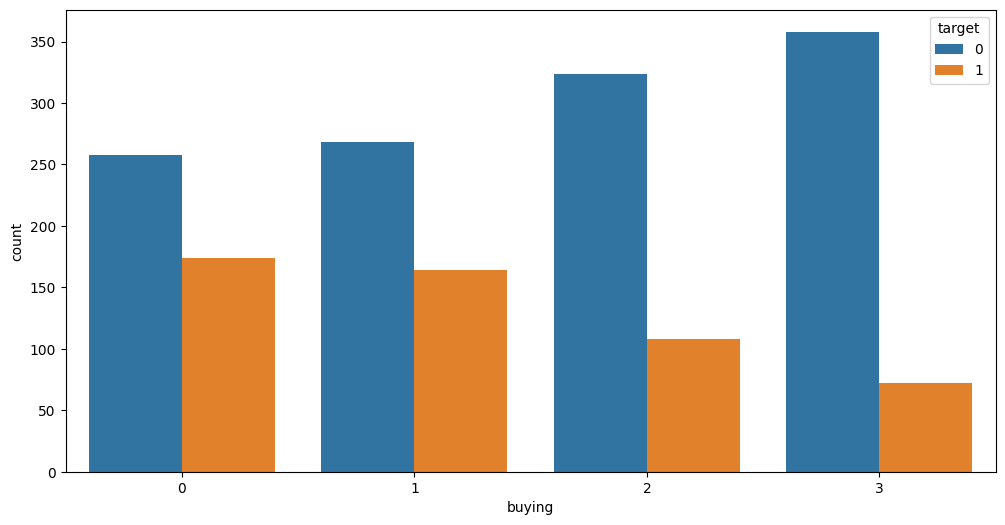

In [ ]:

plt.figure(figsize= (12,6))
sns.countplot(x = 'buying', data = df1, hue = 'target')

✅ From this counplot we can see that as buying price increases the chances of car getting accepted decreases i.e. people usually don't buy high priced cars. Because where the buying price is very high (3), the unaccepted rate is highest. ✅

<Axes: xlabel='maintainance', ylabel='count'>

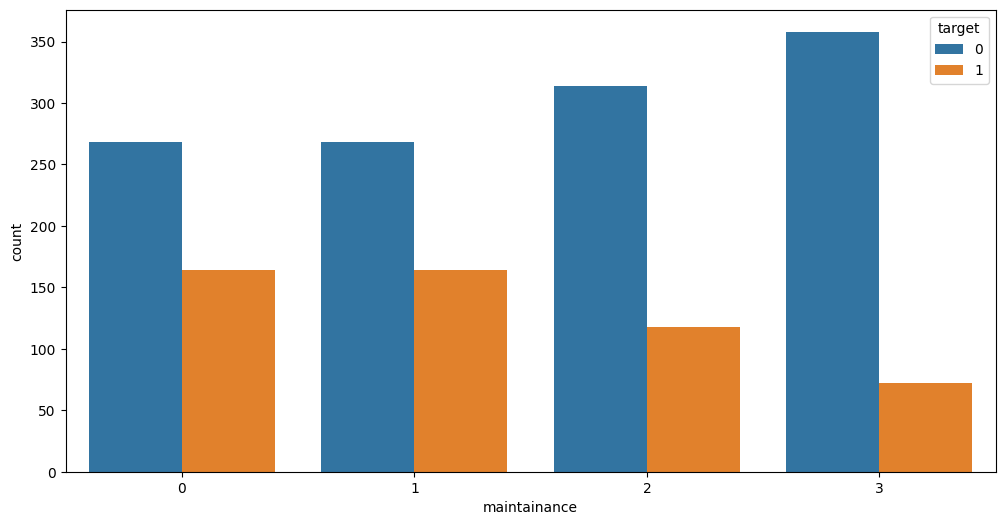

In [ ]:
plt.figure(figsize= (12,6))
sns.countplot(x = 'maintainance', data = df1, hue = 'target')

✅ From this countplot also we can see that the chance of getting accepted for high cost maintainance cars is very low and for low cost maintainance cars is more. That is people usually don't prefer cars with high maintainance. ✅

<Axes: xlabel='safety', ylabel='count'>

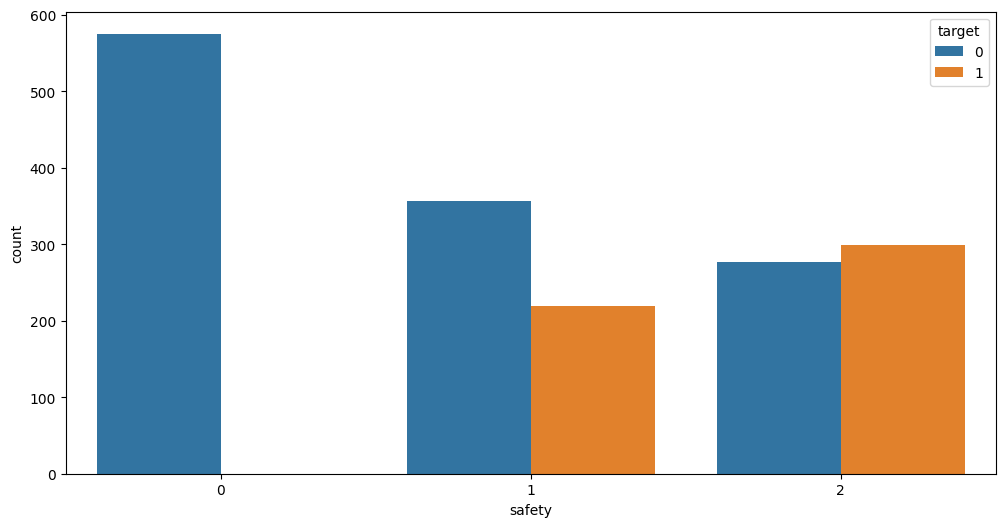

In [ ]:
plt.figure(figsize= (12,6))
sns.countplot(x = 'safety', data = df1, hue = 'target')

✅ From the above countplot we can se that cars with zero safety level is totally unaccepted and cars with very good safety level is the most accepted. ✅

<Axes: xlabel='doors', ylabel='target'>

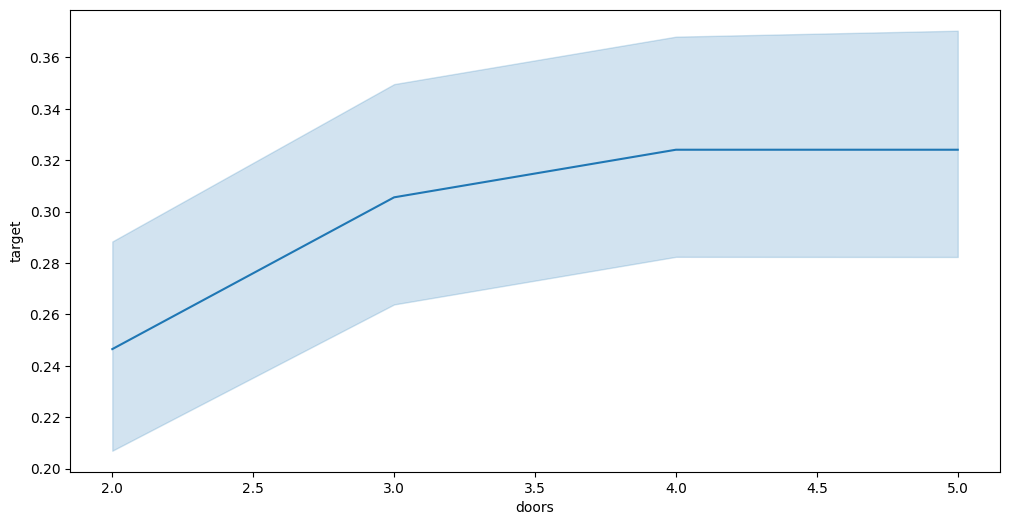

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x= 'doors', y= 'target', data = df1)

✅ From this graph we can conclude that as the number of doors increases, the chances of getting accepted also increases. ✅

<Axes: xlabel='lug_storage', ylabel='target'>

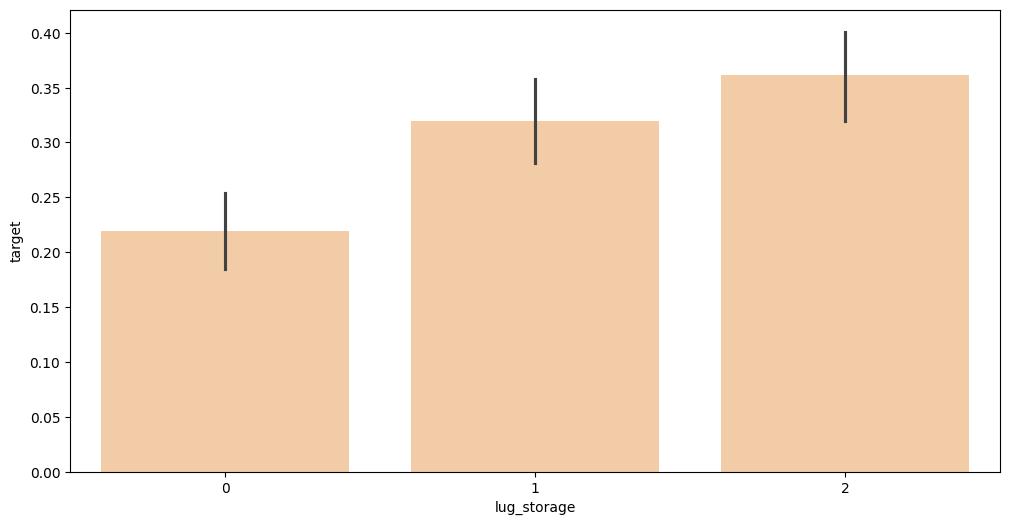

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x= 'lug_storage', y= 'target', data = df1, color = '#FFCC99')

✅ From the above barplot we can conclude that as the luggage space increases, the chances of car getting accepted also increases. ✅

<Axes: xlabel='persons', ylabel='target'>

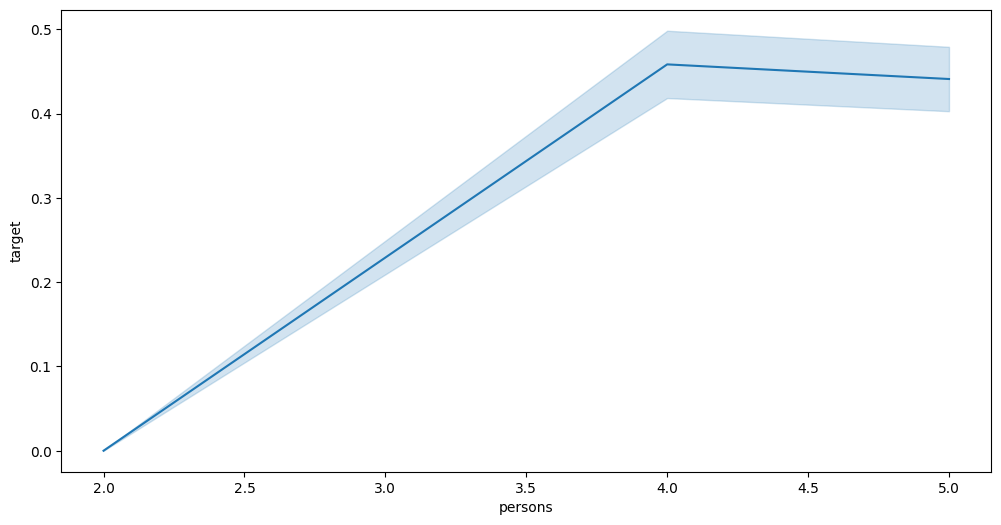

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x= 'persons', y= 'target', data = df1)

✅ From the above countplot we can see that the most acepted seating capacity for a car is four and the less accepted is two. ✅

<Axes: xlabel='target', ylabel='count'>

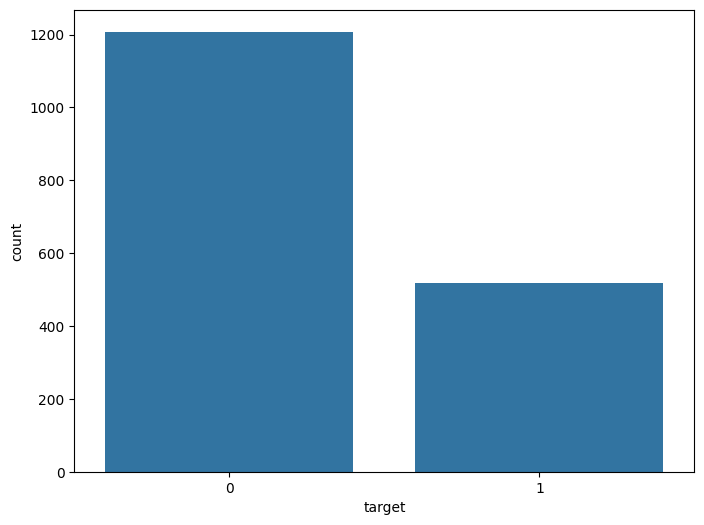

In [ ]:
# plot countplopt to check data is balanced or not
# data is balanced if we have equal observations
plt.figure(figsize = (8,6))
sns.countplot(x= 'target', data = df1)

Here, we can see that our data is imbalanced. ✅

## **Model Building** 🏗

In [ ]:
# split data
x = df1.drop('target', axis = 1)
y = df1['target']

In [ ]:
# split data for training and spliting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify= y)


In [ ]:
# initialise the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# train the model
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# coefficients (or weights) assigned to each feature in the model
model.coef_

array([[-1.05996148, -0.95838399,  0.34368949,  2.03338767,  0.89276367,
         2.92412297]])



*   By examining the coefficients, we can understand which features have a stronger influence on the target variable.
*   Positive coefficients indicate a positive relationship
* can help in feature selection by identifying which features are most important.



In [ ]:
model.intercept_

array([-11.91211895])

In [ ]:
# modelprediction
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
# evaluate the classification model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[226,  16],
       [ 29,  75]])

[Text(0, 0.5, 'unacceptable'), Text(0, 1.5, 'acceptable')]

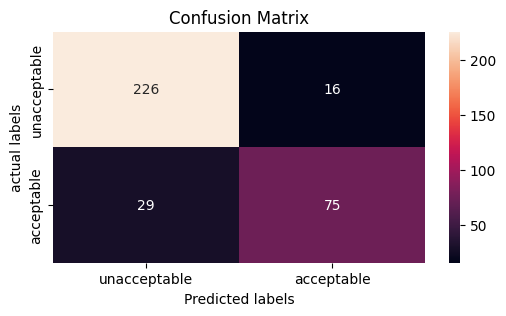

In [ ]:
labels = ['unacceptable','acceptable']

plt.figure(figsize = (6,3))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt = 'd')           # annot true to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# accuracy score
accuracy_score(y_test, y_pred)

0.869942196531792

In [ ]:
# precision score
precision_score(y_test, y_pred)

0.8241758241758241

In [ ]:
# recall score
recall_score(y_test, y_pred)

0.7211538461538461

In [ ]:
# f1 score
f1_score(y_test, y_pred)

0.7692307692307693

In [ ]:
from sklearn.metrics import roc_auc_score, log_loss

# measures the performance of the model independently of the scale of predicted probabilities.
# Lower log loss values indicate better model performance.
log_loss(y_test, y_pred)


4.687758388758011

In [ ]:
# roc auc score is insensitive to class imbalance
# ROC AUC score closer to 1 indicates that the classifier has excellent discriminatory power
#  provides a comprehensive assessment of a binary classification

roc_auc_score(y_test, y_pred)


0.8275190718372537


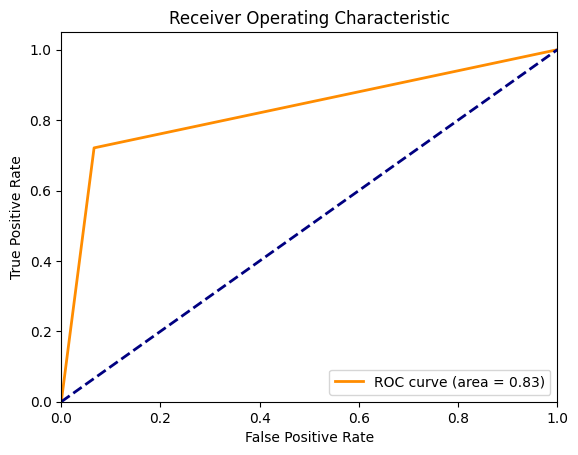

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## **Conclusion** 😍


From the above evaluated matrics we can make some conclusions -

*    The accuracy score of 0.86 indicates that the model correctly predicts for approximately 86% of the instances in the dataset.
*   The precision score of 0.82 suggests that when the model predicts the positive class, it is correct approximately 82% of the time.
* A balanced precision and recall suggest that the model is performing reasonably well in both identifying relevant instances (precision) and avoiding false negatives (recall).
* The F1 score i.e. 0.76, provides a balance between precision and recall and is particularly useful when there is an uneven class distribution. A higher F1 score indicates better overall performance in terms of both precision and recall.
* A roc_auc_score of 0.82 indicates good discriminatory power, with a higher score indicating better performance.



Overall, the model appears to perform well across multiple evaluation metrics, suggesting that it is effective for the given binary classification task.

